# Load Dataset

In [54]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
assessments         = pd.read_csv("drive/My Drive/dataset/anonymisedData/assessments.csv")
courses             = pd.read_csv("drive/My Drive/dataset/anonymisedData/courses.csv")
studentAssessment   = pd.read_csv("drive/My Drive/dataset/anonymisedData/studentAssessment.csv")
studentInfo         = pd.read_csv("drive/My Drive/dataset/anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("drive/My Drive/dataset/anonymisedData/studentRegistration.csv")
studentVle          = pd.read_csv("drive/My Drive/dataset/anonymisedData/studentVle.csv")
vle                 = pd.read_csv("drive/My Drive/dataset/anonymisedData/vle.csv")

# EDA assessments  

In [58]:
# Menampilkan 5 data teratas pada assessments.csv
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [59]:
# Menampilkan 5 data terakhir pada assessments.csv
assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [60]:
# Menampilkan ukuran pada assessments.csv
assessments.shape

(206, 6)

In [61]:
# Menampilkan ringkasan informasi pada assessments.csv
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [62]:
# Menampilkan ringkasan statistik deskriptif pada assessments.csv
assessments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_assessment,206.0,26473.975728,10098.625521,1752.0,15023.25,25364.5,34891.75,40088.0
date,195.0,145.005128,76.001119,12.0,71.00,152.0,222.00,261.0
weight,206.0,20.873786,30.384224,0.0,0.00,12.5,24.25,100.0


In [63]:
# Melihat missing value pada assessments.csv
assessments.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [64]:
# Penanganan missing value pada fitur 'date' di assessments.csv
assessments['date'] = assessments['date'].fillna(int(assessments['date'].astype(float).mean()))
assessments.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [65]:
# Melihat unique value pada assessments.csv
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  75
weight                24
dtype: int64

In [66]:
# Melihat data duplikat pada assessments.csv
assessments.duplicated().sum()

0

In [67]:
# Mengkategorikan fitur yang ada pada assessments.csv
assessments_numerical_features = [feature for feature in assessments.columns if assessments[feature].dtypes != 'O']
assessments_discrete_features = [feature for feature in assessments_numerical_features if len(assessments[feature].unique())<25]
assessments_continuous_features = [feature for feature in assessments_numerical_features if feature not in assessments_discrete_features]
assessments_categorical_features = [feature for feature in assessments.columns if feature not in assessments_numerical_features]
assessments_binary_categorical_features = [feature for feature in assessments_categorical_features if len(assessments[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(assessments_numerical_features)))
print("Discrete features Count {}".format(len(assessments_discrete_features)))
print("Continuous features Count {}".format(len(assessments_continuous_features)))
print("Categorical features Count {}".format(len(assessments_categorical_features)))
print("Binary Categorical features Count {}".format(len(assessments_binary_categorical_features)))

Numerical Features Count 3
Discrete features Count 1
Continuous features Count 2
Categorical features Count 3
Binary Categorical features Count 1


In [125]:
# Melihat fitur pada assessments.csv yang memiliki outlier
assessments_outliers_features = [feature for feature in assessments_continuous_features if feature not in ['ID']]
print(assessments_outliers_features)

['id_assessment', 'date']


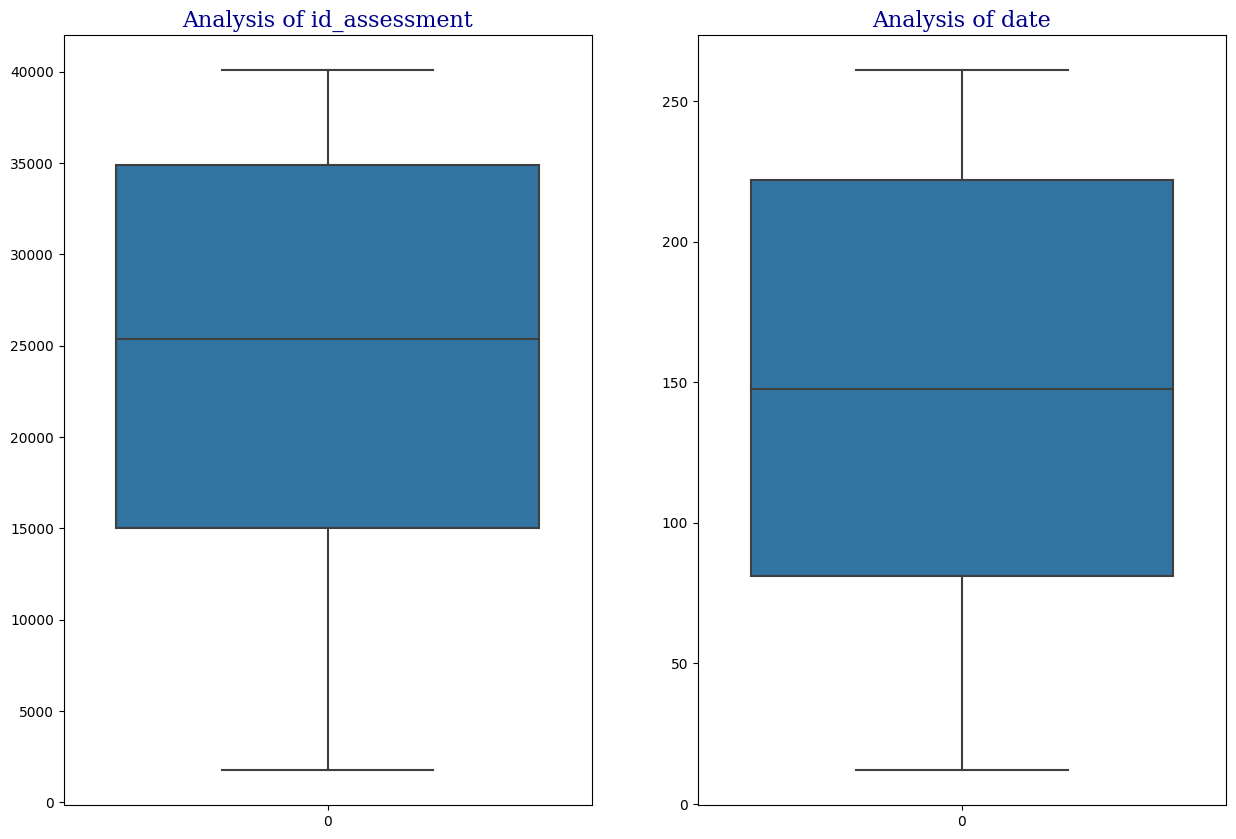

In [126]:
# Melihat data pada assessments.csv yang memiliki outliers
def plot_boxplot(assessments, assessments_continuous_features):
    data = assessments[assessments_continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)

    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

plot_boxplot(assessments, assessments_continuous_features)

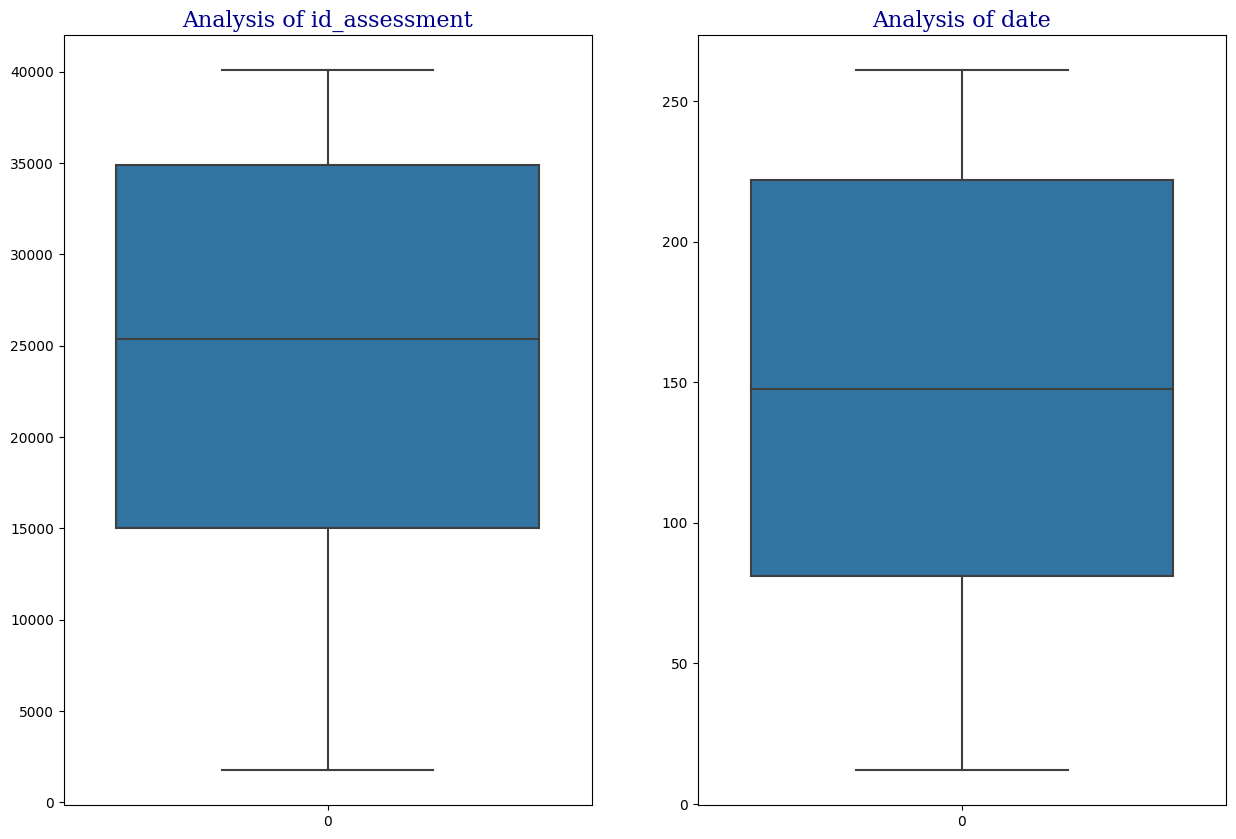

In [127]:
# Hapus data outlier yang ada pada assessments.csv
def remove_outliers(assessments, assessments_outliers_features):
    data = assessments.copy()
    for feature in data[assessments_outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(assessments, assessments_outliers_features)
plot_boxplot(assessments, assessments_outliers_features)

# EDA courses  

In [71]:
# Menampilkan 5 data teratas pada courses.csv
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [72]:
# Menampilkan 5 data terakhir pada courses.csv
courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [73]:
# Menampilkan ukuran pada courses.csv
courses.shape

(22, 3)

In [74]:
# Menampilkan ringkasan informasi pada courses.csv
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [75]:
# Menampilkan ringkasan statistik deskriptif pada courses.csv
courses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
module_presentation_length,22.0,255.545455,13.654677,234.0,241.0,261.5,268.0,269.0


In [76]:
# Melihat missing value pada courses.csv
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [77]:
# Melihat unique value pada courses.csv
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [78]:
# Melihat data duplikat pada courses.csv
courses.duplicated().sum()

0

In [79]:
# Mengkategorikan fitur yang ada pada courses.csv
courses_numerical_features = [feature for feature in courses.columns if courses[feature].dtypes != 'O']
courses_discrete_features = [feature for feature in courses_numerical_features if len(courses[feature].unique())<25]
courses_continuous_features = [feature for feature in courses_numerical_features if feature not in courses_discrete_features]
courses_categorical_features = [feature for feature in courses.columns if feature not in courses_numerical_features]
courses_binary_categorical_features = [feature for feature in courses_categorical_features if len(courses[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(courses_numerical_features)))
print("Discrete features Count {}".format(len(courses_discrete_features)))
print("Continuous features Count {}".format(len(courses_continuous_features)))
print("Categorical features Count {}".format(len(courses_categorical_features)))
print("Binary Categorical features Count {}".format(len(courses_binary_categorical_features)))

Numerical Features Count 1
Discrete features Count 1
Continuous features Count 0
Categorical features Count 2
Binary Categorical features Count 0


In [80]:
# Melihat fitur pada courses.csv yang memiliki outlier
courses_outliers_features = [feature for feature in courses_continuous_features if feature not in ['ID']]
print(courses_outliers_features)

[]


# EDA studentAssessment  

In [81]:
# Menampilkan 5 data teratas pada studentAssessment.csv
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [82]:
# Menampilkan 5 data terakhir pada studentAssessment.csv
studentAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [83]:
# Menampilkan ukuran pada studentAssessment.csv
studentAssessment.shape

(173912, 5)

In [84]:
# Menampilkan ringkasan informasi pada studentAssessment.csv
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [85]:
# Menampilkan ringkasan statistik deskriptif pada studentAssessment.csv
studentAssessment.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_assessment,173912.0,26553.803556,8829.784254,1752.0,15022.0,25359.0,34883.0,37443.0
id_student,173912.0,705150.717225,552395.190998,6516.0,504429.0,585208.0,634498.0,2698588.0
date_submitted,173912.0,116.032942,71.484148,-11.0,51.0,116.0,173.0,608.0
is_banked,173912.0,0.010977,0.104194,0.0,0.0,0.0,0.0,1.0
score,173739.0,75.799573,18.798107,0.0,65.0,80.0,90.0,100.0


In [86]:
# Melihat missing value pada studentAssessment.csv
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [87]:
# Penanganan missing value pada fitur 'date' di studentAssessment.csv
studentAssessment['score'] = studentAssessment['score'].fillna(studentAssessment['score'].mean())
studentAssessment.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [88]:
# Melihat unique value pada studentAssessment.csv
studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               102
dtype: int64

In [89]:
# Melihat data duplikat pada studentAssessment.csv
studentAssessment.duplicated().sum()

0

In [90]:
# Mengkategorikan fitur yang ada pada studentAssessment.csv
studentAssessment_numerical_features = [feature for feature in studentAssessment.columns if studentAssessment[feature].dtypes != 'O']
studentAssessment_discrete_features = [feature for feature in studentAssessment_numerical_features if len(studentAssessment[feature].unique())<25]
studentAssessment_continuous_features = [feature for feature in studentAssessment_numerical_features if feature not in studentAssessment_discrete_features]
studentAssessment_categorical_features = [feature for feature in studentAssessment.columns if feature not in studentAssessment_numerical_features]
studentAssessment_binary_categorical_features = [feature for feature in studentAssessment_categorical_features if len(studentAssessment[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(studentAssessment_numerical_features)))
print("Discrete features Count {}".format(len(studentAssessment_discrete_features)))
print("Continuous features Count {}".format(len(studentAssessment_continuous_features)))
print("Categorical features Count {}".format(len(studentAssessment_categorical_features)))
print("Binary Categorical features Count {}".format(len(studentAssessment_binary_categorical_features)))

Numerical Features Count 5
Discrete features Count 1
Continuous features Count 4
Categorical features Count 0
Binary Categorical features Count 0


In [91]:
# Melihat fitur pada studentAssessment.csv yang memiliki outlier
studentAssessment_outliers_features = [feature for feature in studentAssessment_continuous_features if feature not in ['ID']]
print(studentAssessment_outliers_features)

['id_assessment', 'id_student', 'date_submitted', 'score']


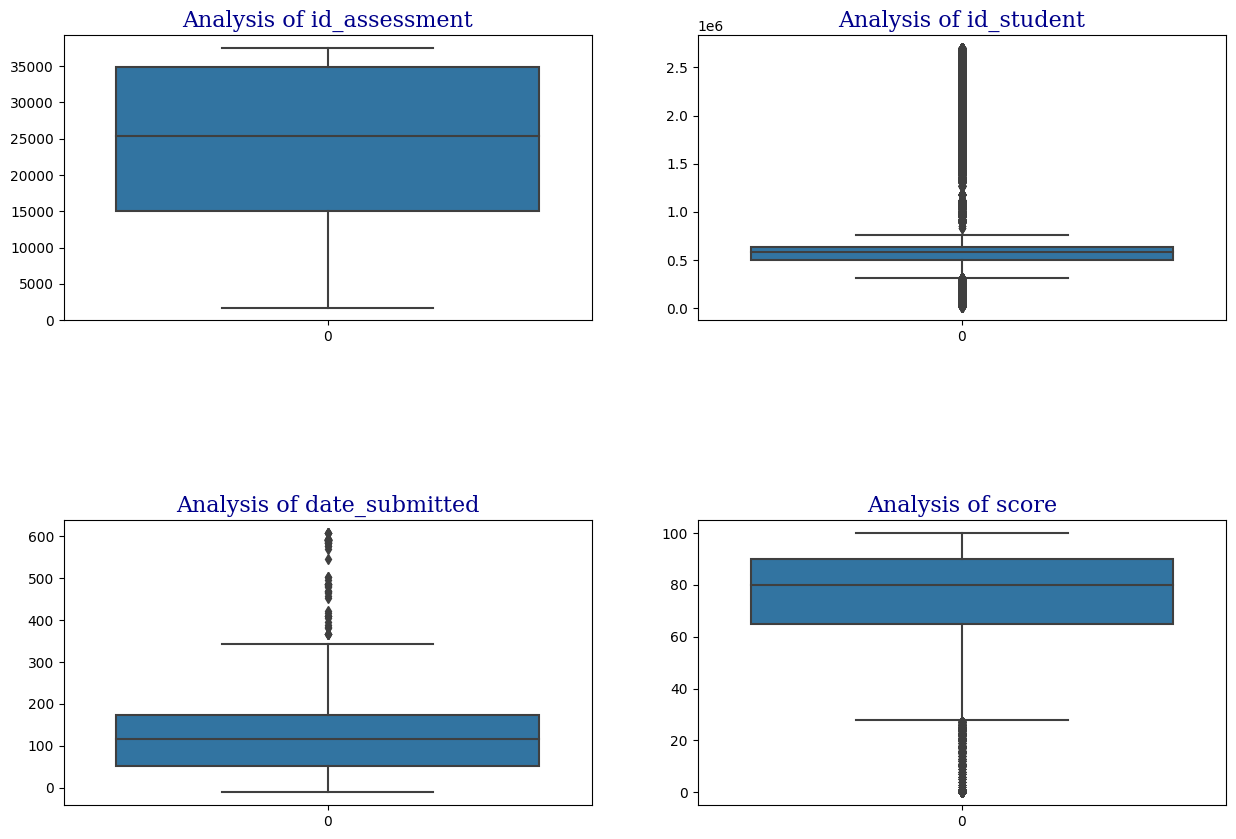

In [92]:
# Melihat data pada studentAssessment.csv yang memiliki outliers
def plot_boxplot(studentAssessment, studentAssessment_continuous_features):
    data = studentAssessment[studentAssessment_continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)

    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

plot_boxplot(studentAssessment, studentAssessment_continuous_features)

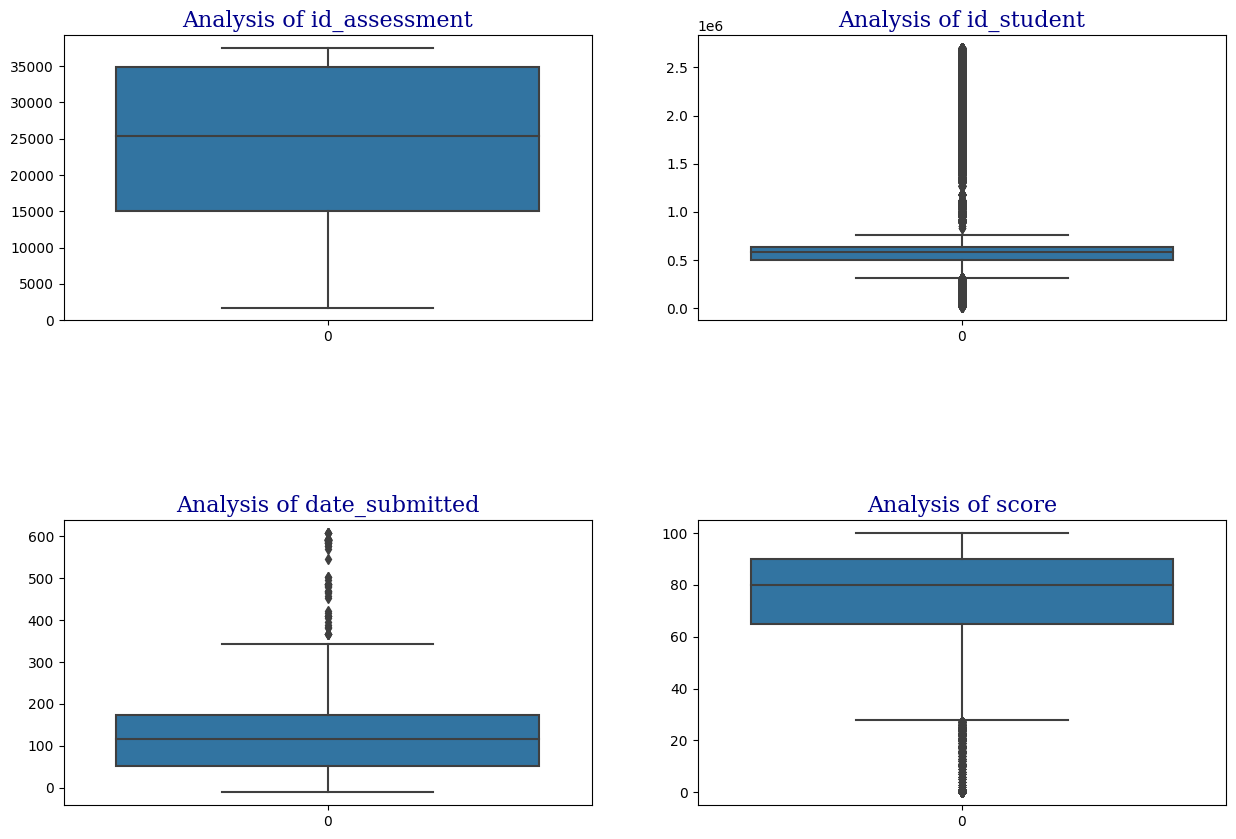

In [93]:
# Hapus data outlier yang ada pada studentAssessment.csv
def remove_outliers(studentAssessment, studentAssessment_outliers_features):
    data = studentAssessment.copy()
    for feature in data[studentAssessment_outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(studentAssessment, studentAssessment_outliers_features)
plot_boxplot(studentAssessment, studentAssessment_outliers_features)

# EDA studentInfo

In [94]:
# Menampilkan 5 data teratas pada studentInfo.csv
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [95]:
# Menampilkan 5 data terakhir pada studentInfo.csv
studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [96]:
# Menampilkan ukuran pada studentInfo.csv
studentInfo.shape

(32593, 12)

In [97]:
# Menampilkan ringkasan informasi pada studentInfo.csv
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [98]:
# Menampilkan ringkasan statistik deskriptif pada studentInfo.csv
studentInfo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_student,32593.0,706687.669131,549167.313855,3733.0,508573.0,590310.0,644453.0,2716795.0
num_of_prev_attempts,32593.0,0.163225,0.479758,0.0,0.0,0.0,0.0,6.0
studied_credits,32593.0,79.758691,41.071900,30.0,60.0,60.0,120.0,655.0


In [99]:
# Melihat missing value pada studentInfo.csv
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [101]:
# Penanganan missing value pada fitur 'imd_band' di studentInfo.csv
print(studentInfo['imd_band'].unique(), "\n\n")
studentInfo['imd_band'] = studentInfo['imd_band'].fillna(studentInfo['imd_band'].mode()[0])
studentInfo.isnull().sum()

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' '60-70%' '40-50%'
 '10-20' '0-10%'] 




code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [104]:
# Melihat unique value pada studentInfo.csv
studentInfo.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [103]:
# Melihat data duplikat pada studentInfo.csv
studentInfo.duplicated().sum()

0

In [105]:
# Mengkategorikan fitur yang ada pada studentInfo.csv
studentInfo_numerical_features = [feature for feature in studentInfo.columns if studentInfo[feature].dtypes != 'O']
studentInfo_discrete_features = [feature for feature in studentInfo_numerical_features if len(studentInfo[feature].unique())<25]
studentInfo_continuous_features = [feature for feature in studentInfo_numerical_features if feature not in studentInfo_discrete_features]
studentInfo_categorical_features = [feature for feature in studentInfo.columns if feature not in studentInfo_numerical_features]
studentInfo_binary_categorical_features = [feature for feature in studentInfo_categorical_features if len(studentInfo[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(studentInfo_numerical_features)))
print("Discrete features Count {}".format(len(studentInfo_discrete_features)))
print("Continuous features Count {}".format(len(studentInfo_continuous_features)))
print("Categorical features Count {}".format(len(studentInfo_categorical_features)))
print("Binary Categorical features Count {}".format(len(studentInfo_binary_categorical_features)))

Numerical Features Count 3
Discrete features Count 1
Continuous features Count 2
Categorical features Count 9
Binary Categorical features Count 3


In [106]:
# Melihat fitur pada studentInfo.csv yang memiliki outlier
studentInfo_outliers_features = [feature for feature in studentInfo_continuous_features if feature not in ['ID']]
print(studentInfo_outliers_features)

['id_student', 'studied_credits']


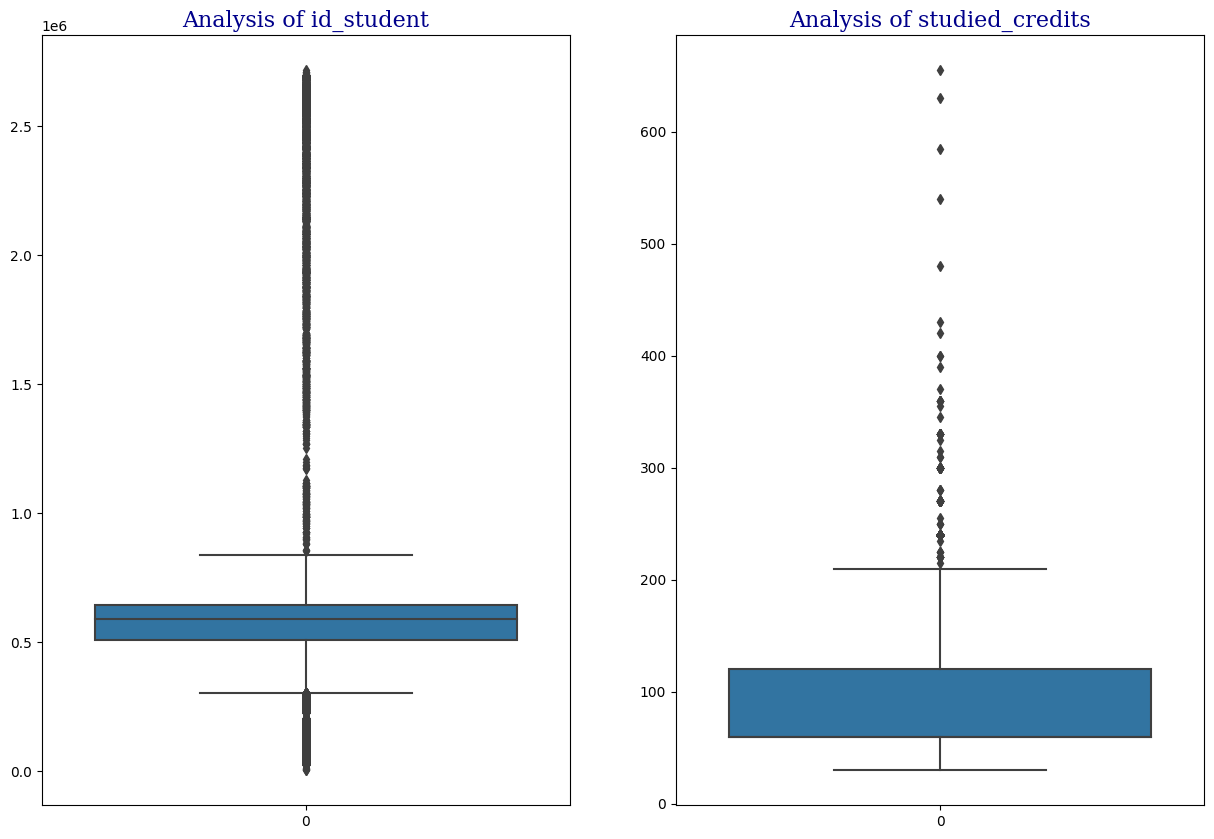

In [107]:
# Melihat data pada studentInfo.csv yang memiliki outliers
def plot_boxplot(studentInfo, studentInfo_continuous_features):
    data = studentInfo[studentInfo_continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)

    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

plot_boxplot(studentInfo, studentInfo_continuous_features)

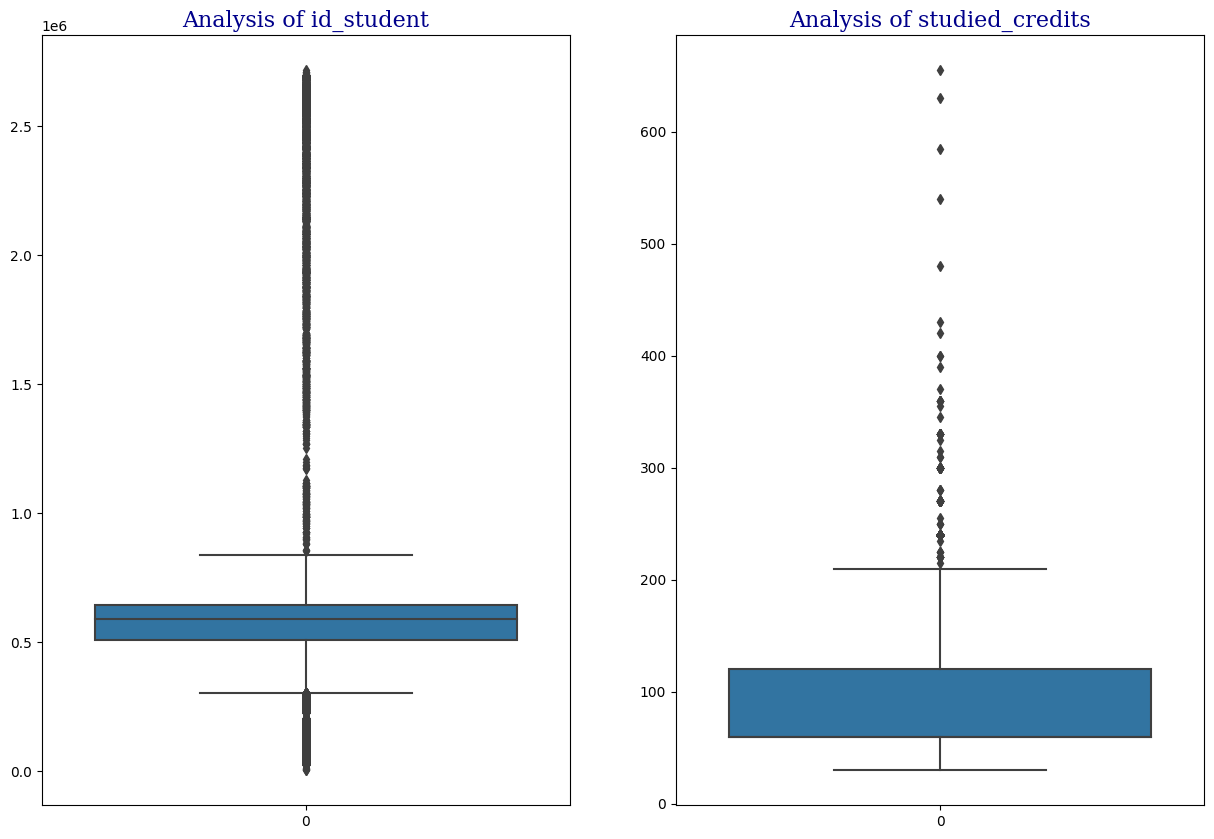

In [108]:
# Hapus data outlier yang ada pada assessments.csv
def remove_outliers(studentInfo, studentInfo_outliers_features):
    data = studentInfo.copy()
    for feature in data[studentInfo_outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(studentInfo, studentInfo_outliers_features)
plot_boxplot(studentInfo, studentInfo_outliers_features)

# EDA studentRegistration

In [110]:
# Menampilkan 5 data teratas pada studentRegistration.csv
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [109]:
# Menampilkan 5 data terakhir pada studentRegistration.csv
studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [111]:
# Menampilkan ukuran pada studentRegistration.csv
studentRegistration.shape

(32593, 5)

In [112]:
# Menampilkan ringkasan informasi pada studentRegistration.csv
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [113]:
# Menampilkan ringkasan statistik deskriptif pada studentRegistration.csv
studentRegistration.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_student,32593.0,706687.669131,549167.313855,3733.0,508573.0,590310.0,644453.0,2716795.0
date_registration,32548.0,-69.411300,49.260522,-322.0,-100.0,-57.0,-29.0,167.0
date_unregistration,10072.0,49.757645,82.460890,-365.0,-2.0,27.0,109.0,444.0


In [114]:
# Melihat missing value pada studentRegistration.csv
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [117]:
# Penanganan missing value pada fitur 'date_unregistration' di studentRegistration.csv
studentRegistration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in studentRegistration['date_unregistration']]
studentRegistration['date_registration']   = studentRegistration['date_registration'].fillna(0).astype(float).apply(abs)
studentRegistration.isnull().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

In [128]:
# Melihat unique value pada studentRegistration.csv
studentRegistration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        295
date_unregistration        1
dtype: int64

In [129]:
# Melihat data duplikat pada studentRegistration.csv
studentRegistration.duplicated().sum()

0

In [130]:
# Mengkategorikan fitur yang ada pada studentRegistration.csv
studentRegistration_numerical_features = [feature for feature in studentRegistration.columns if studentRegistration[feature].dtypes != 'O']
studentRegistration_discrete_features = [feature for feature in studentRegistration_numerical_features if len(studentRegistration[feature].unique())<25]
studentRegistration_continuous_features = [feature for feature in studentRegistration_numerical_features if feature not in studentRegistration_discrete_features]
studentRegistration_categorical_features = [feature for feature in studentRegistration.columns if feature not in studentRegistration_numerical_features]
studentRegistration_binary_categorical_features = [feature for feature in studentRegistration_categorical_features if len(studentRegistration[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(studentRegistration_numerical_features)))
print("Discrete features Count {}".format(len(studentRegistration_discrete_features)))
print("Continuous features Count {}".format(len(studentRegistration_continuous_features)))
print("Categorical features Count {}".format(len(studentRegistration_categorical_features)))
print("Binary Categorical features Count {}".format(len(studentRegistration_binary_categorical_features)))

Numerical Features Count 2
Discrete features Count 0
Continuous features Count 2
Categorical features Count 3
Binary Categorical features Count 1


In [131]:
# Melihat fitur pada studentRegistration.csv yang memiliki outlier
studentRegistration_outliers_features = [feature for feature in studentRegistration_continuous_features if feature not in ['ID']]
print(studentRegistration_outliers_features)

['id_student', 'date_registration']


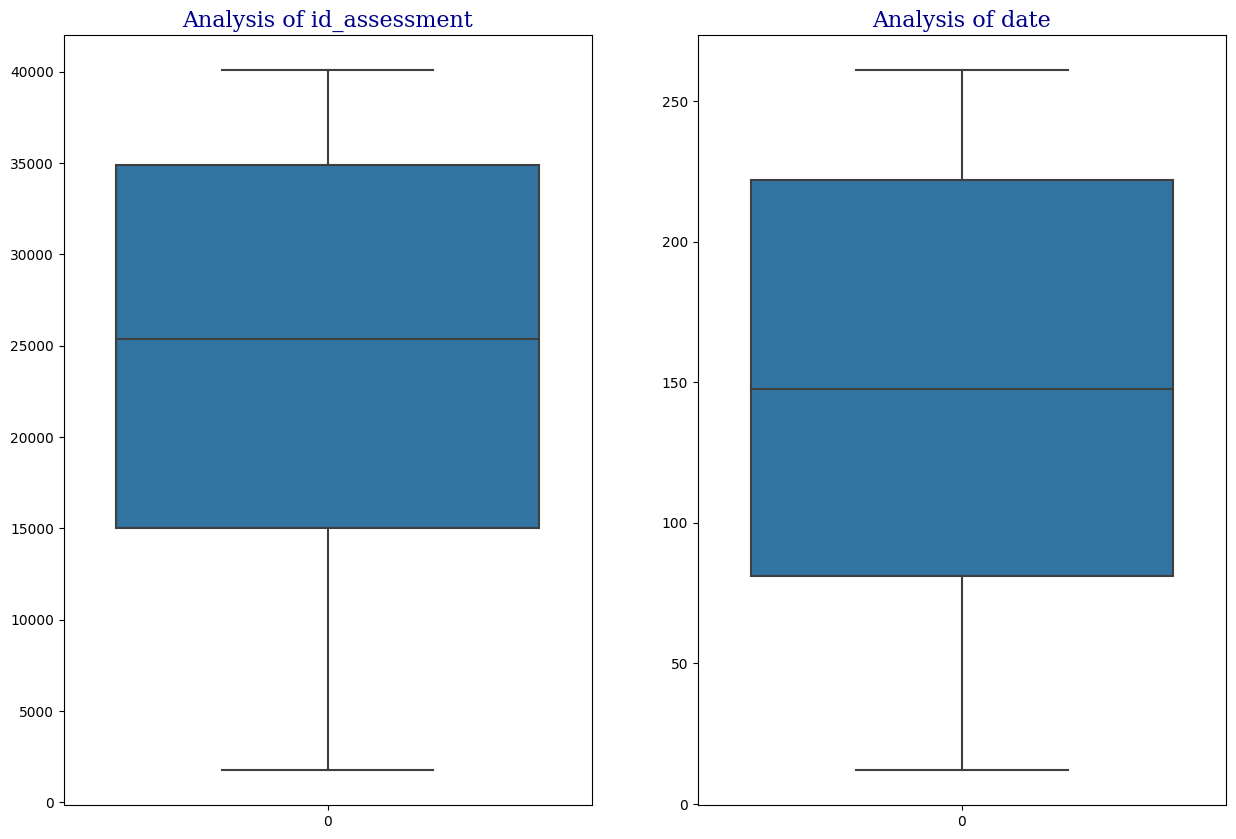

In [132]:
# Melihat data pada studentRegistration.csv yang memiliki outliers
def plot_boxplot(studentRegistration, studentRegistration_continuous_features):
    data = assessments[assessments_continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)

    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

plot_boxplot(assessments, assessments_continuous_features)

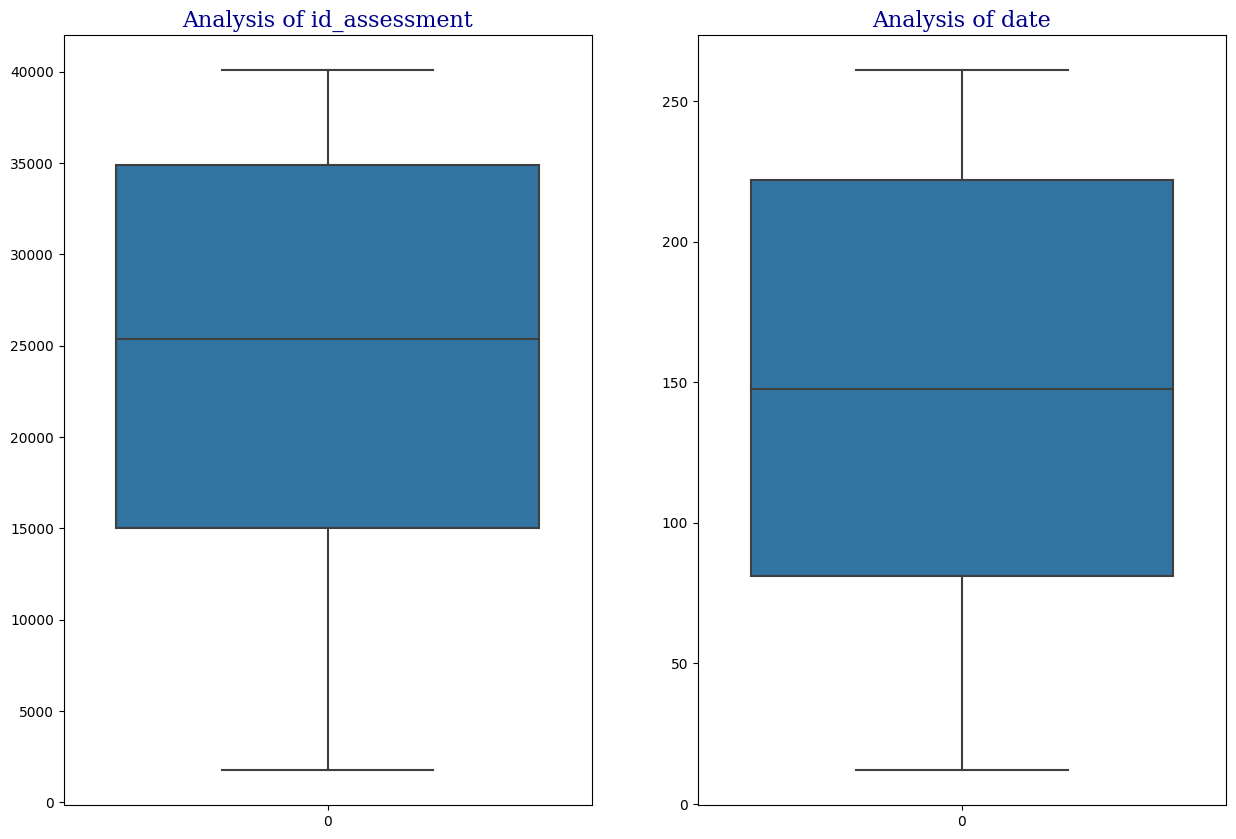

In [133]:
# Hapus data outlier yang ada pada assessments.csv
def remove_outliers(assessments, assessments_outliers_features):
    data = assessments.copy()
    for feature in data[assessments_outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(assessments, assessments_outliers_features)
plot_boxplot(assessments, assessments_outliers_features)

# EDA studentVle

In [136]:
# Menampilkan 5 data teratas pada studentVle.csv
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [137]:
# Menampilkan 5 data terakhir pada studentVle.csv
studentVle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [138]:
# Menampilkan ukuran pada studentVle.csv
studentVle.shape

(10655280, 6)

In [139]:
# Menampilkan ringkasan informasi pada studentVle.csv
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [140]:
# Menampilkan ringkasan statistik deskriptif pada studentVle.csv
studentVle.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_student,10655280.0,733333.566872,582705.982511,6516.0,507743.0,588236.0,646484.0,2698588.0
id_site,10655280.0,738323.416400,131219.622162,526721.0,673519.0,730069.0,877030.0,1049562.0
date,10655280.0,95.174000,76.071301,-25.0,25.0,86.0,156.0,269.0
sum_click,10655280.0,3.716946,8.849047,1.0,1.0,2.0,3.0,6977.0


In [141]:
# Melihat missing value padastudentVle.csv
studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [142]:
# Melihat unique value pada studentVle.csv
studentVle.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [143]:
# Melihat data duplikat pada studentVle.csv
studentVle.duplicated().sum()

787170

In [145]:
# Hapus data duplicate yang ada pada studentVle.csv
studentVle = studentVle.drop_duplicates()
print(studentVle.shape)
studentVle.head()

(9868110, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8


In [146]:
# Mengkategorikan fitur yang ada pada studentVle.csv
studentVle_numerical_features = [feature for feature in studentVle.columns if studentVle[feature].dtypes != 'O']
studentVle_discrete_features = [feature for feature in studentVle_numerical_features if len(studentVle[feature].unique())<25]
studentVle_continuous_features = [feature for feature in studentVle_numerical_features if feature not in studentVle_discrete_features]
studentVle_categorical_features = [feature for feature in studentVle.columns if feature not in studentVle_numerical_features]
studentVle_binary_categorical_features = [feature for feature in studentVle_categorical_features if len(studentVle[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(studentVle_numerical_features)))
print("Discrete features Count {}".format(len(studentVle_discrete_features)))
print("Continuous features Count {}".format(len(studentVle_continuous_features)))
print("Categorical features Count {}".format(len(studentVle_categorical_features)))
print("Binary Categorical features Count {}".format(len(studentVle_binary_categorical_features)))

Numerical Features Count 4
Discrete features Count 0
Continuous features Count 4
Categorical features Count 2
Binary Categorical features Count 0


In [147]:
# Melihat fitur pada studentVle.csv yang memiliki outlier
studentVle_outliers_features = [feature for feature in studentVle_continuous_features if feature not in ['ID']]
print(studentVle_outliers_features)

['id_student', 'id_site', 'date', 'sum_click']


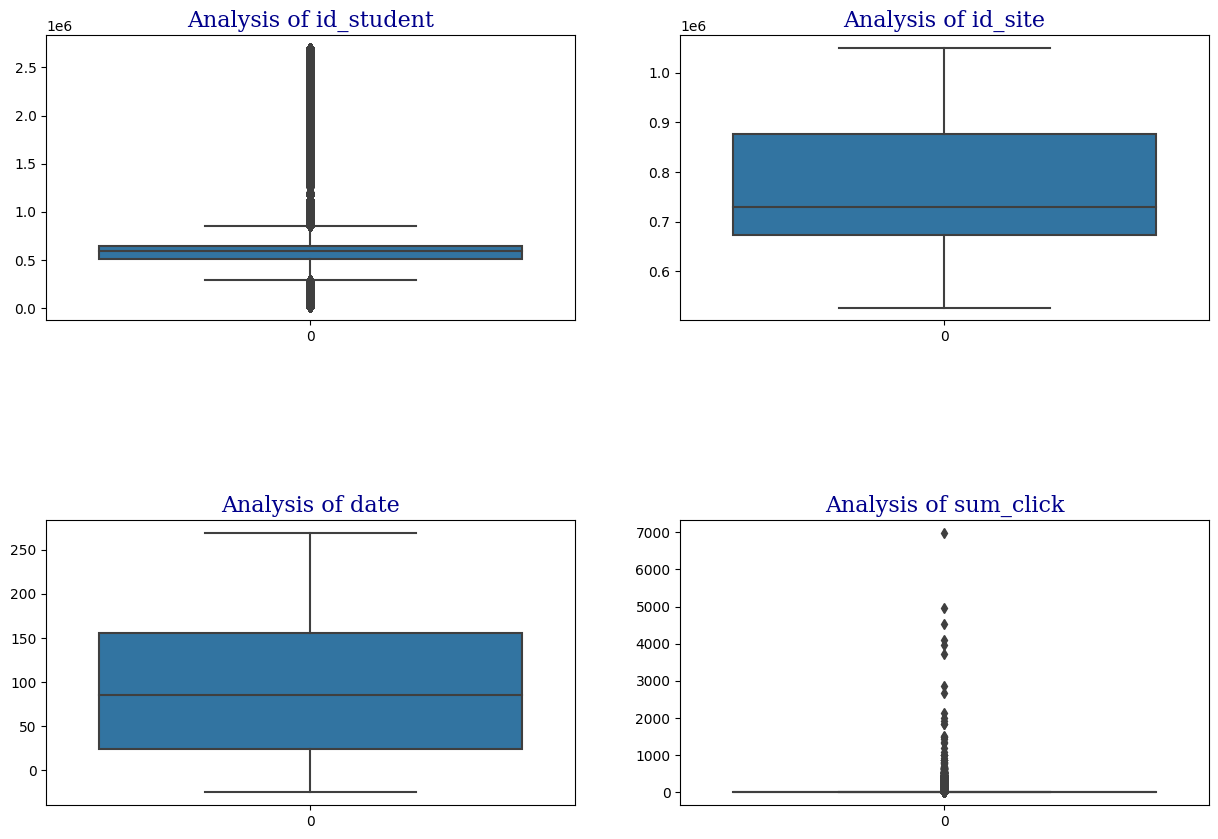

In [148]:
# Melihat data pada studentVle.csv yang memiliki outliers
def plot_boxplot(studentVle, studentVle_continuous_features):
    data = studentVle[studentVle_continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.7)

    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

plot_boxplot(studentVle, studentVle_continuous_features)

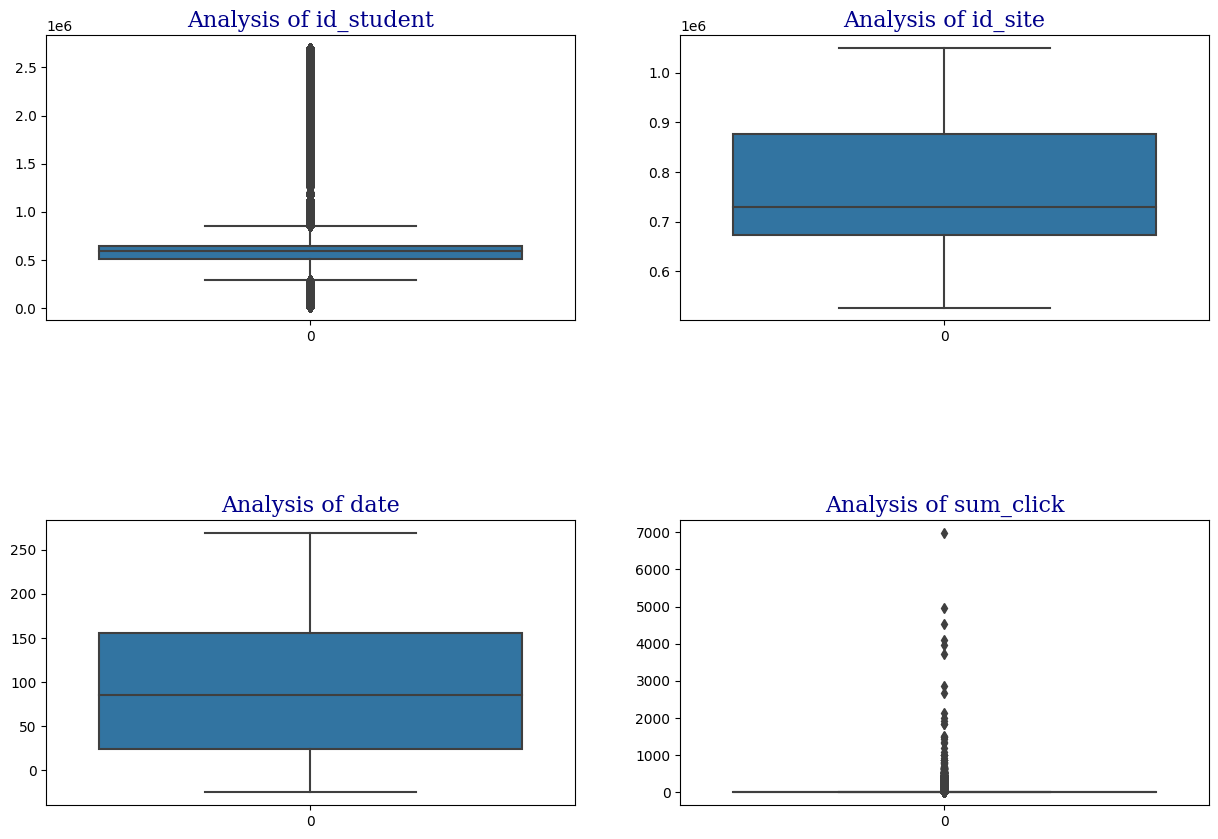

In [150]:
# Hapus data outlier yang ada pada studentVle.csv
def remove_outliers(studentVle, studentVle_outliers_features):
    data = studentVle.copy()
    for feature in data[studentVle_outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
    return data

df = remove_outliers(studentVle, studentVle_outliers_features)
plot_boxplot(studentVle, studentVle_outliers_features)

# EDA vle

In [151]:
# Menampilkan 5 data teratas pada vle.csv
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [152]:
# Menampilkan 5 data terakhir pada vle.csv
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [153]:
# Menampilkan ukuran pada vle.csv
vle.shape

(6364, 6)

In [154]:
# Menampilkan ringkasan informasi pada vle.csv
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [155]:
# Menampilkan ringkasan statistik deskriptif pada vle.csv
vle.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_site,6364.0,726099.094123,128315.137473,526721.0,661592.75,730096.5,814016.25,1077905.0
week_from,1121.0,15.204282,8.792865,0.0,8.00,15.0,22.00,29.0
week_to,1121.0,15.214987,8.779806,0.0,8.00,15.0,22.00,29.0


In [156]:
# Melihat missing value pada vle.csv
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [163]:
# Hapus data yang memiliki missing value pada vle.csv
vle = vle.drop(['week_from', 'week_to'], axis=1)
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [164]:
# Melihat unique value pada vle.csv
vle.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
dtype: int64

In [165]:
# Melihat data duplikat pada vle.csv
vle.duplicated().sum()

0